In [1]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.legend_handler import HandlerLine2D
import numpy as np
import matplotlib
import statsmodels.formula.api as smf
import pickle
import re
from tqdm.notebook import tqdm
tqdm.pandas()

/home/xh3993/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


0
1
2
3
4
5


/home/xh3993/anaconda3/lib/python3.7/site-packages/seaborn/algorithms.py:70: RuntimeWarning: Mean of empty slice.
  return getattr(x, func)()
/home/xh3993/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/xh3993/anaconda3/lib/python3.7/site-packages/seaborn/algorithms.py:70: RuntimeWarning: Mean of empty slice.
  return getattr(x, func)()
/home/xh3993/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


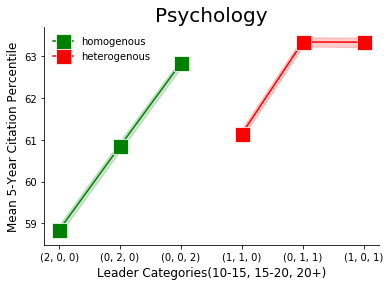

In [6]:
discipline_name='Psychology'
data=pd.read_csv('/data/openalex/processed/sharedleadership/'+discipline_name+'_teams.csv')
print('the number of papers', len(data))
data['sci_age']=data['sci_age'].progress_apply(lambda x: eval(x))
def seniority(x):
    return 1 if len([i for i in x if i>=10])==0 else 0,len([i for i in x if (i>=10)&(i<15)]),len([i for i in x if (i>=15)&(i<20)]),len([i for i in x if i>=20])
data['seniority']=data['sci_age'].progress_apply(lambda x: seniority(x))
data['seniority_n']=data['seniority'].progress_apply(lambda x: np.sum(x))
data['seniority1']=data['seniority'].progress_apply(lambda x: str(x[1:]))
data['citation2_rank']=data.groupby(['year'])['citation2'].rank(pct=True)
data['citation5_rank']=data.groupby(['year'])['citation5'].rank(pct=True)
data['citation10_rank']=data.groupby(['year'])['citation10'].rank(pct=True)
data['citation2_rank']=data['citation2_rank']*100
data['citation5_rank']=data['citation5_rank']*100
data['citation10_rank']=data['citation10_rank']*100
print('the number of two leaders',len(data[data['seniority_n']==2]))
print('the propotion of two leaders among multiple leaders',len(data[data['seniority_n']==2])/len(data[data['seniority_n']>=2]))
data=data[data['seniority_n']==2]
def position(x):
    a=[]
    for e,i in enumerate(x):
        if i>=10:
            a.append(e)
    return a
data['position']=data['sci_age'].apply(lambda x: position(x))
data['last_two']=data['len'].apply(lambda x: [x-2,x-1])
data['first_last']=data['len'].apply(lambda x: [0,x-1])
data['mean_leader']=data['sci_age'].apply(lambda x: np.mean([i for i in x if i>=10]))
len(data[(data['position']==data['last_two'])|(data['position']==data['first_last'])])
choose_data=data[(data['position']==data['last_two'])|(data['position']==data['first_last'])]
print(Counter(choose_data['seniority1'].values))
choose_data.to_csv('/data/openalex/processed/sharedleadership/'+discipline_name+'_sharedleadership.csv',index=False)
e=['(2, 0, 0)', '(0, 2, 0)', '(0, 0, 2)', '(1, 1, 0)', '(0, 1, 1)', '(1, 0, 1)']

data1=pd.DataFrame()
for i,n in enumerate(e):
    print(i)
    _=choose_data[choose_data['seniority1']==n]
    for q in range(10):
        data1=data1.append(_.sample(20000,random_state=100))
def homo(x):
    if (x=='(2, 0, 0)') or (x=='(0, 2, 0)') or (x=='(0, 0, 2)'):
        return 'homogenous'
    else:
        return 'heterogenous'       
data1['type']=data1['seniority1'].apply(lambda x: homo(x))
data1['seniority1']=pd.Categorical(data1['seniority1'],categories=e,ordered=True)
plt.figure(figsize=(6,4))
ax=sns.lineplot(data=data1, x="seniority1", y="citation10_rank",hue='type',marker="s",markersize=15,palette=['green','red'])
plt.xlabel('Leader Categories(10-15, 15-20, 20+)',fontsize=12)
plt.ylabel('Mean 5-Year Citation Percentile',fontsize=12)
plt.legend(frameon=False, labels=['homogenous','heterogenous'])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title(discipline_name, fontsize=20)
# plt.savefig('/home/xh3993/sharedleadership/picture/homo_hete.png',dpi=300)
plt.show()


the number of papers 18897611


  0%|          | 0/18897611 [00:00<?, ?it/s]

  0%|          | 0/18897611 [00:00<?, ?it/s]

  0%|          | 0/18897611 [00:00<?, ?it/s]

  0%|          | 0/18897611 [00:00<?, ?it/s]

the number of two leaders 3182042
the propotion of two leaders among multiple leaders 0.5070188196783166
Counter({'(1, 0, 1)': 526680, '(0, 0, 2)': 476021, '(0, 1, 1)': 407089, '(1, 1, 0)': 276207, '(2, 0, 0)': 226265, '(0, 2, 0)': 138896})
0
1
2
3
4
5


/home/xh3993/anaconda3/lib/python3.7/site-packages/seaborn/algorithms.py:70: RuntimeWarning: Mean of empty slice.
  return getattr(x, func)()
/home/xh3993/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/xh3993/anaconda3/lib/python3.7/site-packages/seaborn/algorithms.py:70: RuntimeWarning: Mean of empty slice.
  return getattr(x, func)()
/home/xh3993/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


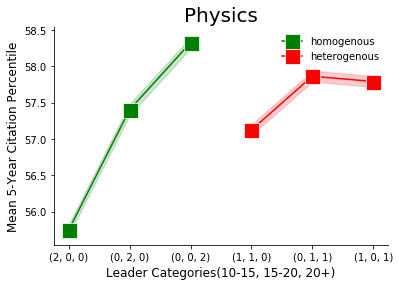

In [7]:
discipline_name='Physics'
data=pd.read_csv('/data/openalex/processed/sharedleadership/'+discipline_name+'_teams.csv')
print('the number of papers', len(data))
data['sci_age']=data['sci_age'].progress_apply(lambda x: eval(x))
def seniority(x):
    return 1 if len([i for i in x if i>=10])==0 else 0,len([i for i in x if (i>=10)&(i<15)]),len([i for i in x if (i>=15)&(i<20)]),len([i for i in x if i>=20])
data['seniority']=data['sci_age'].progress_apply(lambda x: seniority(x))
data['seniority_n']=data['seniority'].progress_apply(lambda x: np.sum(x))
data['seniority1']=data['seniority'].progress_apply(lambda x: str(x[1:]))
data['citation2_rank']=data.groupby(['year'])['citation2'].rank(pct=True)
data['citation5_rank']=data.groupby(['year'])['citation5'].rank(pct=True)
data['citation10_rank']=data.groupby(['year'])['citation10'].rank(pct=True)
data['citation2_rank']=data['citation2_rank']*100
data['citation5_rank']=data['citation5_rank']*100
data['citation10_rank']=data['citation10_rank']*100
print('the number of two leaders',len(data[data['seniority_n']==2]))
print('the propotion of two leaders among multiple leaders',len(data[data['seniority_n']==2])/len(data[data['seniority_n']>=2]))
data=data[data['seniority_n']==2]
def position(x):
    a=[]
    for e,i in enumerate(x):
        if i>=10:
            a.append(e)
    return a
data['position']=data['sci_age'].apply(lambda x: position(x))
data['last_two']=data['len'].apply(lambda x: [x-2,x-1])
data['first_last']=data['len'].apply(lambda x: [0,x-1])
data['mean_leader']=data['sci_age'].apply(lambda x: np.mean([i for i in x if i>=10]))
len(data[(data['position']==data['last_two'])|(data['position']==data['first_last'])])
choose_data=data[(data['position']==data['last_two'])|(data['position']==data['first_last'])]
print(Counter(choose_data['seniority1'].values))
choose_data.to_csv('/data/openalex/processed/sharedleadership/'+discipline_name+'_sharedleadership.csv',index=False)
e=['(2, 0, 0)', '(0, 2, 0)', '(0, 0, 2)', '(1, 1, 0)', '(0, 1, 1)', '(1, 0, 1)']

data1=pd.DataFrame()
for i,n in enumerate(e):
    print(i)
    _=choose_data[choose_data['seniority1']==n]
    for q in range(10):
        data1=data1.append(_.sample(50000,random_state=100))
def homo(x):
    if (x=='(2, 0, 0)') or (x=='(0, 2, 0)') or (x=='(0, 0, 2)'):
        return 'homogenous'
    else:
        return 'heterogenous'       
data1['type']=data1['seniority1'].apply(lambda x: homo(x))
data1['seniority1']=pd.Categorical(data1['seniority1'],categories=e,ordered=True)
plt.figure(figsize=(6,4))
ax=sns.lineplot(data=data1, x="seniority1", y="citation10_rank",hue='type',marker="s",markersize=15,palette=['green','red'])
plt.xlabel('Leader Categories(10-15, 15-20, 20+)',fontsize=12)
plt.ylabel('Mean 5-Year Citation Percentile',fontsize=12)
plt.legend(frameon=False, labels=['homogenous','heterogenous'])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title(discipline_name, fontsize=20)
# plt.savefig('/home/xh3993/sharedleadership/picture/homo_hete.png',dpi=300)
plt.show()


0
1
2
3
4
5


/home/xh3993/anaconda3/lib/python3.7/site-packages/seaborn/algorithms.py:70: RuntimeWarning: Mean of empty slice.
  return getattr(x, func)()
/home/xh3993/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/xh3993/anaconda3/lib/python3.7/site-packages/seaborn/algorithms.py:70: RuntimeWarning: Mean of empty slice.
  return getattr(x, func)()
/home/xh3993/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


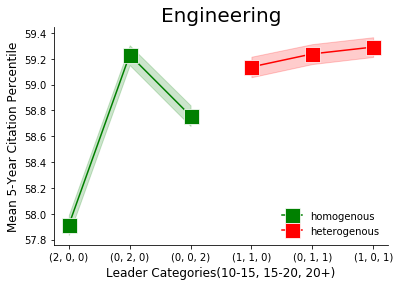

In [14]:
discipline_name='Engineering'
data=pd.read_csv('/data/openalex/processed/sharedleadership/'+discipline_name+'_teams.csv')
print('the number of papers', len(data))
data['sci_age']=data['sci_age'].progress_apply(lambda x: eval(x))
def seniority(x):
    return 1 if len([i for i in x if i>=10])==0 else 0,len([i for i in x if (i>=10)&(i<15)]),len([i for i in x if (i>=15)&(i<20)]),len([i for i in x if i>=20])
data['seniority']=data['sci_age'].progress_apply(lambda x: seniority(x))
data['seniority_n']=data['seniority'].progress_apply(lambda x: np.sum(x))
data['seniority1']=data['seniority'].progress_apply(lambda x: str(x[1:]))
data['citation2_rank']=data.groupby(['year'])['citation2'].rank(pct=True)
data['citation5_rank']=data.groupby(['year'])['citation5'].rank(pct=True)
data['citation10_rank']=data.groupby(['year'])['citation10'].rank(pct=True)
data['citation2_rank']=data['citation2_rank']*100
data['citation5_rank']=data['citation5_rank']*100
data['citation10_rank']=data['citation10_rank']*100
print('the number of two leaders',len(data[data['seniority_n']==2]))
print('the propotion of two leaders among multiple leaders',len(data[data['seniority_n']==2])/len(data[data['seniority_n']>=2]))
data=data[data['seniority_n']==2]
def position(x):
    a=[]
    for e,i in enumerate(x):
        if i>=10:
            a.append(e)
    return a
data['position']=data['sci_age'].apply(lambda x: position(x))
data['last_two']=data['len'].apply(lambda x: [x-2,x-1])
data['first_last']=data['len'].apply(lambda x: [0,x-1])
data['mean_leader']=data['sci_age'].apply(lambda x: np.mean([i for i in x if i>=10]))
len(data[(data['position']==data['last_two'])|(data['position']==data['first_last'])])
choose_data=data[(data['position']==data['last_two'])|(data['position']==data['first_last'])]
print(Counter(choose_data['seniority1'].values))
choose_data.to_csv('/data/openalex/processed/sharedleadership/'+discipline_name+'_sharedleadership.csv',index=False)
e=['(2, 0, 0)', '(0, 2, 0)', '(0, 0, 2)', '(1, 1, 0)', '(0, 1, 1)', '(1, 0, 1)']

data1=pd.DataFrame()
for i,n in enumerate(e):
    print(i)
    _=choose_data[choose_data['seniority1']==n]
    for q in range(10):
        data1=data1.append(_.sample(50000,random_state=100))
def homo(x):
    if (x=='(2, 0, 0)') or (x=='(0, 2, 0)') or (x=='(0, 0, 2)'):
        return 'homogenous'
    else:
        return 'heterogenous'       
data1['type']=data1['seniority1'].apply(lambda x: homo(x))
data1['seniority1']=pd.Categorical(data1['seniority1'],categories=e,ordered=True)
plt.figure(figsize=(6,4))
ax=sns.lineplot(data=data1, x="seniority1", y="citation10_rank",hue='type',marker="s",markersize=15,palette=['green','red'])
plt.xlabel('Leader Categories(10-15, 15-20, 20+)',fontsize=12)
plt.ylabel('Mean 5-Year Citation Percentile',fontsize=12)
plt.legend(frameon=False, labels=['homogenous','heterogenous'])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title(discipline_name, fontsize=20)
# plt.savefig('/home/xh3993/sharedleadership/picture/homo_hete.png',dpi=300)
plt.show()


In [84]:
discipline_name='Sociology'
data=pd.read_csv('/data/openalex/processed/sharedleadership/'+discipline_name+'_teams.csv')
print('the number of papers', len(data))
data['sci_age']=data['sci_age'].progress_apply(lambda x: eval(x))
data['author']=data['author'].progress_apply(lambda x: eval(x))

# delete repeat values
def delete(x,y):
    W={}
    for i,j in zip(x,y):
        W[i]=j
    return W

data['delete']=data.progress_apply(lambda x: delete (x['author'], x['sci_age']), axis=1)
data['author']=data['delete'].progress_apply(lambda x: list(x.keys()))
data['sci_age']=data['delete'].progress_apply(lambda x: list(x.values()))

def seniority(x):
    return 1 if len([i for i in x if i>=10])==0 else 0,len([i for i in x if (i>=10)&(i<15)]),len([i for i in x if (i>=15)&(i<20)]),len([i for i in x if i>=20])
data['seniority']=data['sci_age'].progress_apply(lambda x: seniority(x))
data['seniority_n']=data['seniority'].progress_apply(lambda x: np.sum(x))
data['seniority1']=data['seniority'].progress_apply(lambda x: str(x[1:]))
data['citation2_rank']=data.groupby(['year'])['citation2'].rank(pct=True)
data['citation5_rank']=data.groupby(['year'])['citation5'].rank(pct=True)
data['citation10_rank']=data.groupby(['year'])['citation10'].rank(pct=True)
data['citation2_rank']=data['citation2_rank']*100
data['citation5_rank']=data['citation5_rank']*100
data['citation10_rank']=data['citation10_rank']*100
print('the number of two leaders',len(data[data['seniority_n']==2]))
print('the propotion of two leaders among multiple leaders',len(data[data['seniority_n']==2])/len(data[data['seniority_n']>=2]))
data=data[data['seniority_n']==2]
def position(x):
    a=[]
    for e,i in enumerate(x):
        if i>=10:
            a.append(e)
    return a
data['position']=data['sci_age'].apply(lambda x: position(x))
data['last_two']=data['len'].apply(lambda x: [x-2,x-1])
data['first_last']=data['len'].apply(lambda x: [0,x-1])
data['mean_leader']=data['sci_age'].apply(lambda x: np.mean([i for i in x if i>=10]))
print(len(data[(data['position']==data['last_two'])|(data['position']==data['first_last'])]))
choose_data=data[(data['position']==data['last_two'])|(data['position']==data['first_last'])]
print(Counter(choose_data['seniority1'].values))
choose_data.to_csv('/data/openalex/processed/sharedleadership/'+discipline_name+'_sharedleadership.csv',index=False)

e=['(2, 0, 0)', '(0, 2, 0)', '(0, 0, 2)', '(1, 1, 0)', '(0, 1, 1)', '(1, 0, 1)']
data1=pd.DataFrame()
for i,n in enumerate(e):
    print(i)
    _=choose_data[choose_data['seniority1']==n]
    for q in range(10):
        data1=data1.append(_.sample(18818,random_state=100))
def homo(x):
    if (x=='(2, 0, 0)') or (x=='(0, 2, 0)') or (x=='(0, 0, 2)'):
        return 'homogenous'
    else:
        return 'heterogenous'       
data1['type']=data1['seniority1'].apply(lambda x: homo(x))
data1['seniority1']=pd.Categorical(data1['seniority1'],categories=e,ordered=True)

the number of papers 4153613


  0%|          | 0/4153613 [00:00<?, ?it/s]

  0%|          | 0/4153613 [00:00<?, ?it/s]

  0%|          | 0/4153613 [00:00<?, ?it/s]

  0%|          | 0/4153613 [00:00<?, ?it/s]

  0%|          | 0/4153613 [00:00<?, ?it/s]

  0%|          | 0/4153613 [00:00<?, ?it/s]

  0%|          | 0/4153613 [00:00<?, ?it/s]

  0%|          | 0/4153613 [00:00<?, ?it/s]

the number of two leaders 466525
the propotion of two leaders among multiple leaders 0.5765589739406837
254039
Counter({'(1, 0, 1)': 61220, '(1, 1, 0)': 46787, '(2, 0, 0)': 44258, '(0, 1, 1)': 43310, '(0, 0, 2)': 39646, '(0, 2, 0)': 18818})
0
1
2
3
4
5


In [85]:
data1_sociology=data1
sociology_choose_data=choose_data

In [22]:
discipline_name='Business'
data=pd.read_csv('/data/openalex/processed/sharedleadership/'+discipline_name+'_teams.csv')
print('the number of papers', len(data))
data['sci_age']=data['sci_age'].progress_apply(lambda x: eval(x))
data['author']=data['author'].progress_apply(lambda x: eval(x))

# delete repeat values
def delete(x,y):
    W={}
    for i,j in zip(x,y):
        W[i]=j
    return W

data['delete']=data.progress_apply(lambda x: delete (x['author'], x['sci_age']), axis=1)
data['author']=data['delete'].progress_apply(lambda x: list(x.keys()))
data['sci_age']=data['delete'].progress_apply(lambda x: list(x.values()))

def seniority(x):
    return 1 if len([i for i in x if i>=10])==0 else 0,len([i for i in x if (i>=10)&(i<15)]),len([i for i in x if (i>=15)&(i<20)]),len([i for i in x if i>=20])
data['seniority']=data['sci_age'].progress_apply(lambda x: seniority(x))
data['seniority_n']=data['seniority'].progress_apply(lambda x: np.sum(x))
data['seniority1']=data['seniority'].progress_apply(lambda x: str(x[1:]))
data['citation2_rank']=data.groupby(['year'])['citation2'].rank(pct=True)
data['citation5_rank']=data.groupby(['year'])['citation5'].rank(pct=True)
data['citation10_rank']=data.groupby(['year'])['citation10'].rank(pct=True)
data['citation2_rank']=data['citation2_rank']*100
data['citation5_rank']=data['citation5_rank']*100
data['citation10_rank']=data['citation10_rank']*100
print('the number of two leaders',len(data[data['seniority_n']==2]))
print('the propotion of two leaders among multiple leaders',len(data[data['seniority_n']==2])/len(data[data['seniority_n']>=2]))
data=data[data['seniority_n']==2]
def position(x):
    a=[]
    for e,i in enumerate(x):
        if i>=10:
            a.append(e)
    return a
data['position']=data['sci_age'].apply(lambda x: position(x))
data['last_two']=data['len'].apply(lambda x: [x-2,x-1])
data['first_last']=data['len'].apply(lambda x: [0,x-1])
data['mean_leader']=data['sci_age'].apply(lambda x: np.mean([i for i in x if i>=10]))
print(len(data[(data['position']==data['last_two'])|(data['position']==data['first_last'])]))
choose_data=data[(data['position']==data['last_two'])|(data['position']==data['first_last'])]
print(Counter(choose_data['seniority1'].values))
choose_data.to_csv('/data/openalex/processed/sharedleadership/'+discipline_name+'_sharedleadership.csv',index=False)
e=['(2, 0, 0)', '(0, 2, 0)', '(0, 0, 2)', '(1, 1, 0)', '(0, 1, 1)', '(1, 0, 1)']

data1=pd.DataFrame()
for i,n in enumerate(e):
    print(i)
    _=choose_data[choose_data['seniority1']==n]
    for q in range(10):
        data1=data1.append(_.sample(10000,random_state=100))
def homo(x):
    if (x=='(2, 0, 0)') or (x=='(0, 2, 0)') or (x=='(0, 0, 2)'):
        return 'homogenous'
    else:
        return 'heterogenous'       
data1['type']=data1['seniority1'].apply(lambda x: homo(x))
data1['seniority1']=pd.Categorical(data1['seniority1'],categories=e,ordered=True)



the number of papers 3898943


  0%|          | 0/3898943 [00:00<?, ?it/s]

  0%|          | 0/3898943 [00:00<?, ?it/s]

  0%|          | 0/3898943 [00:00<?, ?it/s]

  0%|          | 0/3898943 [00:00<?, ?it/s]

  0%|          | 0/3898943 [00:00<?, ?it/s]

  0%|          | 0/3898943 [00:00<?, ?it/s]

  0%|          | 0/3898943 [00:00<?, ?it/s]

  0%|          | 0/3898943 [00:00<?, ?it/s]

the number of two leaders 328891
the propotion of two leaders among multiple leaders 0.7201057088932971
193338
Counter({'(1, 0, 1)': 44338, '(2, 0, 0)': 40505, '(1, 1, 0)': 39217, '(0, 1, 1)': 29717, '(0, 0, 2)': 24715, '(0, 2, 0)': 14846})
0
1
2
3
4
5


In [23]:
data1_business=data1
business_choose_data=choose_data

/home/xh3993/anaconda3/lib/python3.7/site-packages/seaborn/algorithms.py:70: RuntimeWarning: Mean of empty slice.
  return getattr(x, func)()
/home/xh3993/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/xh3993/anaconda3/lib/python3.7/site-packages/seaborn/algorithms.py:70: RuntimeWarning: Mean of empty slice.
  return getattr(x, func)()
/home/xh3993/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/xh3993/anaconda3/lib/python3.7/site-packages/seaborn/algorithms.py:70: RuntimeWarning: Mean of empty slice.
  return getattr(x, func)()
/home/xh3993/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/xh3993/anaconda3/lib/python3.7/site-pack

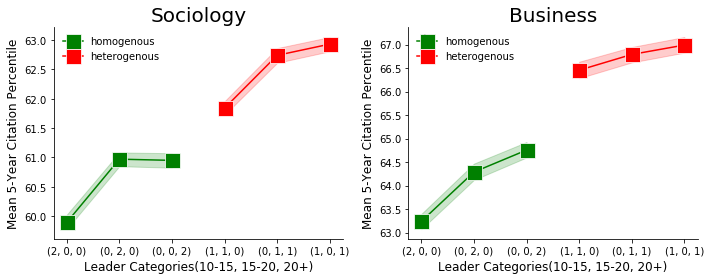

In [28]:
fig=plt.figure(figsize=(10,4))

ax = plt.subplot(1, 2, 1)
ax=sns.lineplot(data=data1_sociology, x="seniority1", y="citation10_rank",hue='type',marker="s",markersize=15,palette=['green','red'])
plt.xlabel('Leader Categories(10-15, 15-20, 20+)',fontsize=12)
plt.ylabel('Mean 5-Year Citation Percentile',fontsize=12)
plt.legend(frameon=False, labels=['homogenous','heterogenous'])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title("Sociology", fontsize=20)

b=ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*0.9
plt.text(0,b,'a',fontsize=20)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax = plt.subplot(1, 2, 2)
ax=sns.lineplot(data=data1_business, x="seniority1", y="citation10_rank",hue='type',marker="s",markersize=15,palette=['green','red'])
plt.xlabel('Leader Categories(10-15, 15-20, 20+)',fontsize=12)
plt.ylabel('Mean 5-Year Citation Percentile',fontsize=12)
plt.legend(frameon=False, labels=['homogenous','heterogenous'])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title("Business", fontsize=20)
b=ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*0.9
plt.text(0,b,'b',fontsize=20)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tight_layout()
plt.savefig('/home/xh3993/sharedleadership/picture/sociology_business.png',dpi=300)

plt.show()

In [86]:
work_doi=pd.read_csv("/data/openalex/processed/work_doi.csv")

In [87]:
work_doi_dict=dict(work_doi[['id','doi']].values)

In [88]:
sociology_choose_data['doi']=sociology_choose_data['work_id'].apply(lambda x: work_doi_dict[x] if x in work_doi_dict else np.nan)

/home/xh3993/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [89]:
sociology_choose_data['doi']=sociology_choose_data['doi'].apply(lambda x: x.split('https://doi.org/')[1] if x==x else x)

/home/xh3993/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [90]:
sociology_choose_data.to_csv('/data/openalex/processed/sharedleadership/Sociology_sharedleadership.csv',index=False)

In [180]:
sociology_choose_data=pd.read_csv('/data/openalex/processed/sharedleadership/Sociology_sharedleadership.csv')

In [181]:
len(sociology_choose_data)

254039

In [182]:
sociology_choose_data['position']=sociology_choose_data['position'].apply(lambda x: eval(x))

In [183]:
f = open('/home/xh3993/redundancy/fenglixu-Self-report-Contribution-Data-6164803/PLOSONE_Contribution_Data', 'rb')
plos_data = pickle.load(f)
f.close()

In [184]:
len(set(sociology_choose_data['doi'].values)&set([i[0] for i in plos_data]))

536

In [185]:
plos_overlap=list(set(sociology_choose_data['doi'].values)&set([i[0] for i in plos_data]))

In [186]:
leader=["conceive","design","lead","supervise","coordinate","interpret","write",'wrote','theor','led']

In [187]:
c=[]
for i,j in zip([i[4] for i in plos_data if i[0] in plos_overlap],[i[3] for i in plos_data if i[0] in plos_overlap]): #choose leaders abrreviations
    c1=[]
    all_abb=[j for m in i.values() for j in m]
    for m,n in i.items():
        for l in leader:
            if l in m:
                c1.extend(n)
    c1=[i.replace('-','').replace('.','') for i in c1]
    b=[]
    d=[]
    for _ in [re.split(r" |. |-",i) for i in j]: #abbreviations from full names
        abb="".join([i[0] for i in _ if len(i)>0]) #sometimes with middle name abbreviation
        if abb in all_abb:
            d.append(abb)
        else:
            abb="".join([i[0] for i in _ if len(i)>1]) #sometimes without middle name abbreviation
            if abb in all_abb:
                d.append(abb)
    for p,q in enumerate(d):
        if q in c1:
            b.append(p)
#     break
    if len(b)>0:
        c.append(b)
    else:
        c.append(list(range(p+1)))

In [188]:
a=[] # identified by ourselves based on career age and authorship
for m in [i[0] for i in plos_data if i[0] in plos_overlap]:
    a.extend(list(sociology_choose_data[sociology_choose_data['doi']==m]['position'].values))

In [189]:
count=[]
for m,n in zip(a,c):
    count.append(all(item in n for item in m))

In [190]:
f = open('/home/xh3993/redundancy/fenglixu-Self-report-Contribution-Data-6164803/Nature_Contribution_Data', 'rb')
nature_data = pickle.load(f)
f.close()

In [191]:
len(set(sociology_choose_data['doi'].values)&set([i[0] for i in nature_data]))

36

In [192]:
nature_overlap=list(set(sociology_choose_data['doi'].values)&set([i[0] for i in nature_data]))

In [193]:
from nltk.tokenize import word_tokenize

In [194]:
standard_nature=[]
for o in nature_overlap:
    i=[j[4] for j in nature_data if j[0]==o][0]
    i=re.sub('([A-Z]).', r'\1',i)
    i=i.replace(';','.')
    p=i.split('. ')
    a={}
    for q in p:
        n=[j for j in word_tokenize(q) if j[-1].isupper()==True]
        a[q]=n
    standard_nature.append(a)

In [195]:
nature_name=[]
for o in nature_overlap:
    nature_name.append([j[3] for j in nature_data if j[0]==o][0])

In [196]:
c=[]
for i,j in zip(standard_nature, nature_name): #choose leaders abrreviations
    a=[]
    for m,n in i.items():
        for l in leader:
            if l in m:
                a.extend(n)
    a=[i.replace('-','').replace('.','') for i in a]
    b=[]
    d=[]
    for _ in [re.split(r" |. |-",i) for i in j]:
        d.append("".join([i[0] for i in _]))
    for p,q in enumerate(d):
        if q in a:
            b.append(p)
    if len(b)>0:
        c.append(b)
    else:
        c.append(list(range(p+1)))

In [197]:
a=[]
for m in nature_overlap:
    a.extend(list(sociology_choose_data[sociology_choose_data['doi']==m]['position'].values))

In [198]:
# count=[]
for m,n in zip(a,c):
    count.append(all(item in n for item in m))

In [199]:
f = open('/home/xh3993/redundancy/fenglixu-Self-report-Contribution-Data-6164803/Science_Contribution_Data', 'rb')
science_data = pickle.load(f)
f.close()

In [200]:
len(set(sociology_choose_data['doi'].values)&set([i[0] for i in science_data]))

4

In [201]:
science_overlap=list(set(sociology_choose_data['doi'].values)&set([i[0] for i in science_data]))

In [202]:
standard_science=[]
for o in science_overlap:
    i=[j[4] for j in science_data if j[0]==o][0]
    i=re.sub('([A-Z]).', r'\1',i)
    i=i.replace(';','.')
    p=i.split('. ')
    a={}
    for q in p:
        n=[j for j in word_tokenize(q) if j[-1].isupper()==True]
        a[q]=n
    standard_science.append(a)

In [203]:
science_name=[]
for o in nature_overlap:
    science_name.append([j[3] for j in nature_data if j[0]==o][0])

In [204]:
c=[]
for i,j in zip(standard_nature, science_name): #choose leaders abrreviations
    a=[]
    for m,n in i.items():
        for l in leader:
            if l in m:
                a.extend(n)
    a=[i.replace('-','').replace('.','') for i in a]
    b=[]
    d=[]
    for _ in [re.split(r" |. |-",i) for i in j]:
        d.append("".join([i[0] for i in _]))
    for p,q in enumerate(d):
        if q in a:
            b.append(p)
    if len(b)>0:
        c.append(b)
    else:
        c.append(list(range(p+1)))

In [205]:
a=[]
for m in science_overlap:
    a.extend(list(sociology_choose_data[sociology_choose_data['doi']==m]['position'].values))

In [206]:
# count=[]
for m,n in zip(a,c):
    count.append(all(item in n for item in m))

In [207]:
f = open('/home/xh3993/redundancy/fenglixu-Self-report-Contribution-Data-6164803/PNAS_Contribution_Data', 'rb')
pnas_data = pickle.load(f)
f.close()

In [208]:
len(set(sociology_choose_data['doi'].values)&set([i[0] for i in pnas_data]))

134

In [209]:
pnas_overlap=list(set(sociology_choose_data['doi'].values)&set([i[0] for i in pnas_data]))

In [210]:
standard_pnas=[]
for o in pnas_overlap:
    i=[j[4] for j in pnas_data if j[0]==o][0]
    i=re.sub('([A-Z]).', r'\1',i)
    i=i.replace(';','.')
    p=i.split('. ')
    a={}
    for q in p:
        n=[j for j in word_tokenize(q) if j[-1].isupper()==True]
        a[q]=n
    standard_pnas.append(a)

In [211]:
pnas_name=[]
for o in pnas_overlap:
    pnas_name.append([j[3] for j in pnas_data if j[0]==o][0])

In [212]:
c=[]
for i,j in zip(standard_pnas, pnas_name): #choose leaders abrreviations
    a=[]
    for m,n in i.items():
        for l in leader:
            if l in m:
                a.extend(n)
    a=[i.replace('-','').replace('.','') for i in a]
    b=[]
    d=[]
    for _ in [re.split(r" |. |-",i) for i in j]:
        d.append("".join([i[0] for i in _]))
    for p,q in enumerate(d):
        if q in a:
            b.append(p)
    if len(b)>0:
        c.append(b)
    else:
        c.append(list(range(p+1)))

In [213]:
a=[]
for m in pnas_overlap:
    a.extend(list(sociology_choose_data[sociology_choose_data['doi']==m]['position'].values))

In [214]:
# count=[]
for m,n in zip(a,c):
    count.append(all(item in n for item in m))

In [215]:
len(count)

710

In [216]:
len([i for i in count if i==True])

561

In [217]:
len([i for i in count if i==True])/len(count)

0.7901408450704225

In [218]:
leader=["conceive","design","lead","supervise","coordinate","interpret","write",'wrote','led']
all_leading=[i[4] for i in plos_data if i[0] in plos_overlap]+standard_nature+standard_science+standard_pnas
for l in leader:
    a=[]
    for i in all_leading:
        for m,n in i.items():
            if l in m:
                a.append(len(n))
    print(l, np.sum(a))

conceive 1515
design 1878
lead 2
supervise 13
coordinate 4
interpret 10
write 0.0
wrote 1995
led 4


In [129]:
sociology_all_overlap=plos_overlap+nature_overlap+science_overlap+pnas_overlap

In [131]:
category_number=[]
correct=[]
for e,i in enumerate(sociology_all_overlap):
    m=sociology_choose_data[sociology_choose_data['doi']==i]['seniority1'].values[0]
    category_number.append(m)
    if count[e]==True:
        correct.append(m)

In [132]:
Counter(category_number)

Counter({'(1, 1, 0)': 130,
         '(0, 0, 2)': 113,
         '(1, 0, 1)': 197,
         '(0, 2, 0)': 42,
         '(2, 0, 0)': 106,
         '(0, 1, 1)': 122})

In [133]:
Counter(correct)

Counter({'(1, 1, 0)': 99,
         '(1, 0, 1)': 166,
         '(0, 2, 0)': 33,
         '(2, 0, 0)': 76,
         '(0, 1, 1)': 94,
         '(0, 0, 2)': 93})

In [73]:
business_choose_data['doi']=business_choose_data['work_id'].apply(lambda x: work_doi_dict[x] if x in work_doi_dict else np.nan)

/home/xh3993/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [75]:
business_choose_data['doi']=business_choose_data['doi'].apply(lambda x: x.split('https://doi.org/')[1] if x==x else x)

/home/xh3993/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [76]:
business_choose_data.to_csv('/data/openalex/processed/sharedleadership/Business_sharedleadership.csv',index=False)

In [134]:
business_choose_data=pd.read_csv('/data/openalex/processed/sharedleadership/Business_sharedleadership.csv')

In [135]:
business_choose_data['position']=business_choose_data['position'].apply(lambda x: eval(x))

In [136]:
f = open('/home/xh3993/redundancy/fenglixu-Self-report-Contribution-Data-6164803/PLOSONE_Contribution_Data', 'rb')
plos_data = pickle.load(f)
f.close()

In [137]:
len(set(business_choose_data['doi'].values)&set([i[0] for i in plos_data]))

25

In [138]:
plos_overlap=list(set(business_choose_data['doi'].values)&set([i[0] for i in plos_data]))

In [139]:
leader=["conceive","design","lead","supervise","coordinate","interpret","write",'wrote','theor','led']

In [140]:
c=[]
for i,j in zip([i[4] for i in plos_data if i[0] in plos_overlap],[i[3] for i in plos_data if i[0] in plos_overlap]): #choose leaders abrreviations
    c1=[]
    all_abb=[j for m in i.values() for j in m]
    for m,n in i.items():
        for l in leader:
            if l in m:
                c1.extend(n)
    c1=[i.replace('-','').replace('.','') for i in c1]
    b=[]
    d=[]
    for _ in [re.split(r" |. |-",i) for i in j]: #abbreviations from full names
        abb="".join([i[0] for i in _ if len(i)>0]) #sometimes with middle name abbreviation
        if abb in all_abb:
            d.append(abb)
        else:
            abb="".join([i[0] for i in _ if len(i)>1]) #sometimes without middle name abbreviation
            if abb in all_abb:
                d.append(abb)
    for p,q in enumerate(d):
        if q in c1:
            b.append(p)
#     break
    if len(b)>0:
        c.append(b)
    else:
        c.append(list(range(p+1)))

In [141]:
a=[] # identified by ourselves based on career age and authorship
for m in [i[0] for i in plos_data if i[0] in plos_overlap]:
    a.extend(list(business_choose_data[business_choose_data['doi']==m]['position'].values))

In [142]:
count=[]
for m,n in zip(a,c):
    count.append(all(item in n for item in m))

In [143]:
f = open('/home/xh3993/redundancy/fenglixu-Self-report-Contribution-Data-6164803/Nature_Contribution_Data', 'rb')
nature_data = pickle.load(f)
f.close()

In [144]:
len(set(business_choose_data['doi'].values)&set([i[0] for i in nature_data]))

2

In [145]:
nature_overlap=list(set(business_choose_data['doi'].values)&set([i[0] for i in nature_data]))

In [146]:
standard_nature=[]
for o in nature_overlap:
    i=[j[4] for j in nature_data if j[0]==o][0]
    i=re.sub('([A-Z]).', r'\1',i)
    i=i.replace(';','.')
    p=i.split('. ')
    a={}
    for q in p:
        n=[j for j in word_tokenize(q) if j[-1].isupper()==True]
        a[q]=n
    standard_nature.append(a)

In [147]:
nature_name=[]
for o in nature_overlap:
    nature_name.append([j[3] for j in nature_data if j[0]==o][0])

In [148]:
c=[]
for i,j in zip(standard_nature, nature_name): #choose leaders abrreviations
    a=[]
    for m,n in i.items():
        for l in leader:
            if l in m:
                a.extend(n)
    a=[i.replace('-','').replace('.','') for i in a]
    b=[]
    d=[]
    for _ in [re.split(r" |. |-",i) for i in j]:
        d.append("".join([i[0] for i in _]))
    for p,q in enumerate(d):
        if q in a:
            b.append(p)
    if len(b)>0:
        c.append(b)
    else:
        c.append(list(range(p+1)))

In [149]:
a=[]
for m in nature_overlap:
    a.extend(list(business_choose_data[business_choose_data['doi']==m]['position'].values))

In [150]:
# count=[]
for m,n in zip(a,c):
    count.append(all(item in n for item in m))

In [151]:
f = open('/home/xh3993/redundancy/fenglixu-Self-report-Contribution-Data-6164803/Science_Contribution_Data', 'rb')
science_data = pickle.load(f)
f.close()

In [152]:
len(set(business_choose_data['doi'].values)&set([i[0] for i in science_data]))

0

In [153]:
f = open('/home/xh3993/redundancy/fenglixu-Self-report-Contribution-Data-6164803/PNAS_Contribution_Data', 'rb')
pnas_data = pickle.load(f)
f.close()

In [154]:
len(set(business_choose_data['doi'].values)&set([i[0] for i in pnas_data]))

16

In [155]:
pnas_overlap=list(set(business_choose_data['doi'].values)&set([i[0] for i in pnas_data]))

In [156]:
standard_pnas=[]
for o in pnas_overlap:
    i=[j[4] for j in pnas_data if j[0]==o][0]
    i=re.sub('([A-Z]).', r'\1',i)
    i=i.replace(';','.')
    p=i.split('. ')
    a={}
    for q in p:
        n=[j for j in word_tokenize(q) if j[-1].isupper()==True]
        a[q]=n
    standard_pnas.append(a)

In [157]:
pnas_name=[]
for o in pnas_overlap:
    pnas_name.append([j[3] for j in pnas_data if j[0]==o][0])

In [158]:
c=[]
for i,j in zip(standard_pnas, pnas_name): #choose leaders abrreviations
    a=[]
    for m,n in i.items():
        for l in leader:
            if l in m:
                a.extend(n)
    a=[i.replace('-','').replace('.','') for i in a]
    b=[]
    d=[]
    for _ in [re.split(r" |. |-",i) for i in j]:
        d.append("".join([i[0] for i in _]))
    for p,q in enumerate(d):
        if q in a:
            b.append(p)
    if len(b)>0:
        c.append(b)
    else:
        c.append(list(range(p+1)))

In [163]:
len(count)

43

In [161]:
a=[]
for m in pnas_overlap:
    a.extend(list(business_choose_data[business_choose_data['doi']==m]['position'].values))

In [162]:
# count=[]
for m,n in zip(a,c):
    count.append(all(item in n for item in m))

In [164]:
len([i for i in count if i==True])

37

In [165]:
len([i for i in count if i==True])/len(count)

0.8604651162790697

In [166]:
len(count)

43

In [174]:
business_all_overlap=plos_overlap+nature_overlap+pnas_overlap

In [175]:
category_number=[]
correct=[]
for e,i in enumerate(business_all_overlap):
    m=business_choose_data[business_choose_data['doi']==i]['seniority1'].values[0]
    category_number.append(m)
    if count[e]==True:
        correct.append(m)

In [176]:
Counter(category_number)

Counter({'(1, 0, 1)': 11,
         '(2, 0, 0)': 9,
         '(1, 1, 0)': 6,
         '(0, 1, 1)': 11,
         '(0, 2, 0)': 4,
         '(0, 0, 2)': 2})

In [178]:
Counter(correct)

Counter({'(1, 0, 1)': 10,
         '(2, 0, 0)': 7,
         '(1, 1, 0)': 6,
         '(0, 2, 0)': 3,
         '(0, 1, 1)': 9,
         '(0, 0, 2)': 2})

In [179]:
leader=["conceive","design","lead","supervise","coordinate","interpret","write",'wrote','led']
all_leading=[i[4] for i in plos_data if i[0] in plos_overlap]+standard_nature+standard_pnas
for l in leader:
    a=[]
    for i in all_leading:
        for m,n in i.items():
            if l in m:
                a.append(len(n))
    print(l, np.sum(a))

conceive 83
design 130
lead 0.0
supervise 0.0
coordinate 0.0
interpret 0.0
write 0.0
wrote 145
led 0.0
